In [ ]:
# Installs kneed if you don't already have it installed.
import sys
!{sys.executable} -m pip install kneed    

In [1]:
# Imports modules which will be used throughout the code.
import pandas as pd                         
import numpy as np                          
import matplotlib                           
from matplotlib import pyplot as plt        
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats, integrate                     
from kneed import KneeLocator               
import math
from sympy.solvers import solve
from sympy import Symbol
import os
import ipywidgets as widgets

C:\Users\bluse\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\bluse\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

In [2]:
# Creates a user interface using the widget module.
widget_width = '900px'                                     
padding = '0px 0px 0px 4px'

text0 = widgets.Text(
    value="",
    description="Filepath or URL:",
    placeholder="Enter filepath or URL to file adding '?raw=true' to the end of any URL",
    style={"description_width": "initial"},
    layout=widgets.Layout(width=widget_width, padding=padding),
)
text0

text1 = widgets.Text(
    value="",
    description="Pad Voltage / V:",
    placeholder="Enter pad voltage",
    style={"description_width": "initial"},
    layout=widgets.Layout(width=widget_width, padding=padding),
)
text1

text2 = widgets.Text(
    value="",
    description="Resistance / $ \Omega $:",
    placeholder="Enter resistance in ohms",
    style={"description_width": "initial"},
    layout=widgets.Layout(width=widget_width, padding=padding),
)
text2

text3 = widgets.Text(
    value="",
    description="Thickness / $\mu$m:",
    placeholder="Enter thickness in micrometres",
    style={"description_width": "initial"},
    layout=widgets.Layout(width=widget_width, padding=padding),
)
text3

text6 = widgets.Text(
    value="",
    description="Filepath to save the data:",
    placeholder="eg. C:/Users/tom/dick/harry",
    style={"description_width": "initial"},
    layout=widgets.Layout(width=widget_width, padding=padding),
)
text6

text8 = widgets.Text(
    value="",
    description="Thickness error / $\mu$m:",
    placeholder="Enter thickness error in micrometres",
    style={"description_width": "initial"},
    layout=widgets.Layout(width=widget_width, padding=padding),
)
text8

# Sets the output of the user input to variables which can be used in the rest of the code.
toolbar_widget = widgets.VBox()
toolbar_widget.children = [
    text0,
    text1,
    text2,
    text3,
    text8,
    text6
    
]
#Displays the widget.
toolbar_widget

#C:/Users/bluse/PycharmProjects/MSciProject/electron_plate_data2.csv
#https://github.com/TimHooray747/Luke-s-MSci-Project-Code/blob/main/MSci%20Project%20Data/electrons120Vpad1.csv?raw=true
#16.9 +- 1.3
#https://github.com/lukehasler12/Luke-s-MSci-Project-Code/blob/main/MSci%20Project%20Data/e60V.csv

 
The datatypes of each column:
Time       float64
Voltage    float64
dtype: object


C:\Users\bluse\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log10
C:\Users\bluse\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in log10


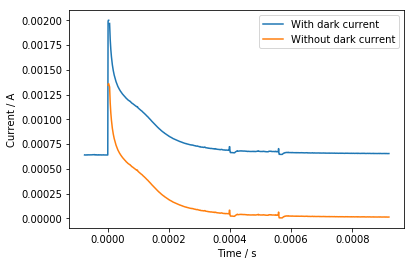

The generated polynomial regression:
 
           20             19             18             17
5.411e+63 x  - 4.755e+61 x  + 1.818e+59 x  - 3.797e+56 x 
              16             15            14             13
 + 4.258e+53 x  - 1.315e+50 x  - 2.93e+47 x  + 3.858e+44 x 
              12             11            10             9
 - 3.954e+40 x  - 3.679e+38 x  + 4.91e+35 x  - 3.561e+32 x
             8             7             6             5             4
 + 1.72e+29 x - 5.859e+25 x + 1.435e+22 x - 2.533e+18 x + 3.192e+14 x
              3             2
 - 2.796e+10 x + 1.602e+06 x - 55.65 x + 0.001487


C:\Users\bluse\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


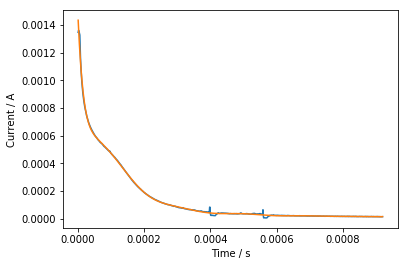

Polynomial photocharge: 1.3077269495391782e-07 with an error of: 1.0740237078041807e-11
 
Cumulative trapezoidal photocharge: 1.3097245394736852e-07


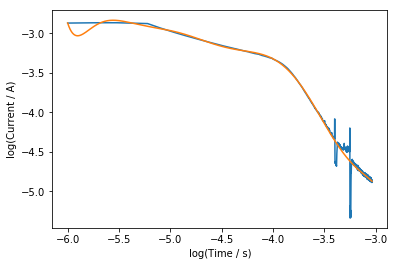

The polynomial for the double logarithmic plot:
 
        10         9         8        7        6             5
0.1287 x  + 5.568 x + 107.5 x + 1219 x + 8987 x + 4.501e+04 x
             4             3           2
 + 1.55e+05 x + 3.623e+05 x + 5.5e+05 x + 4.895e+05 x + 1.939e+05


In [63]:
# Sets variable names for the output of the user interface.
filename = text0.value
Pad_Voltage = float(text1.value)
Resistance = float(text2.value)
Thickness = float(text3.value) * 10 ** (-6)
Thickness_error = float(text8.value) * 10 ** (-6)
filepath = text6.value
# Takes output from the user imput filename and adds extra to create new files and files.
savename = str(filepath) + "/electron_plate_data.csv"
graph_savename = str(filepath) + "/Graphs"

# If the path does not yet exist on the user's PC it will be created by the code.
if not os.path.exists(graph_savename):
    os.makedirs(graph_savename)
    
# If a path for files used in the code does not yet exist they will be created.
if not os.path.exists(str(filepath) + "/Intermediate_files"):
    os.makedirs(str(filepath) + "/Intermediate_files")

# By default this reads the csv format data frame (df) ready for analysis and assumes there are no headers in the data.
# If there are headers in the data you should delete "headers = None, names = ["Time", "Current"]".
df = pd.read_csv(filename, header=None, names=["Time", "Voltage"])

# A new dataframe is created removing the first 11 points to avoid the extra information often contained early
# in the csv files. If the code doesn't work here try adding higher numbers as there may be even more unwanted
# data at the beginning. Missing a few early datapoints makes a negligible difference to the overall results.
df1 = df.drop(labels = [0,1,2,3,4,5,6,7,8,9,10,11], axis = 0)
# Drops any further Not-A-Number values just in case.
df1.dropna()

# The index of the dataframe is reset to ensure the datapoints start at 0 not at 12, etc.
df1.reset_index(drop = True, inplace = True)

# Saves the cleaned data into an intermediate file for use later.
df1.to_csv(str(filepath) + "/Intermediate_files/corrected_testdata.csv", index=False)

# Sets the data to datatype 'float64' if it isn't already in this form
df1["Time"] = df1["Time"].astype("float")           
df1["Voltage"] = df1["Voltage"].astype("float")
# Resets the index of the dataframe to avoid confusion
df1.reset_index(drop = True, inplace = True)        

# Prints the types of data to ensure we definitely don't have any non float64 data remaining. This is mainly here for 
# troubleshooting.
print(" ")
print("The datatypes of each column:")
print(df1.dtypes)

# Creates a column in the dataframe for the current by dividing each value of the pad voltage by the user provided
# resistance.
df1['Current'] = df1["Voltage"] / Resistance
# Removes any infinite values that may have been left in the code by replacing them with Not a Number (NaN) values
# and then deleting any NaN values.
df1.replace([np.inf, -np.inf], np.NaN, inplace=True)
df1.dropna()

# Creates new dataframes for data with times above and below the 0s mark. Works by reading the first corrected file and
# writing a new csv file containing no values where the first character is '-' thereby removing all negative values.
# This means we can still access the data with negative values whilst also having cleaned the initial data.
with open(str(filepath) + "/Intermediate_files/corrected_testdata.csv", 'r') as f:
    with open(str(filepath) + "/Intermediate_files/corrected_testdata_positive.csv", 'w') as g:
        with open(str(filepath) + "/Intermediate_files/correlated_testdata_negative.csv", 'w') as h:
            for row in f:
                if row[0] != '-':
                    g.write(row)
                else:
                    h.write(row)
                    
# Reads the positive and negative dataframes and creates the current values for them both.                    
df2 = pd.read_csv(str(filepath) + "/Intermediate_files/corrected_testdata_positive.csv")
df_negative = pd.read_csv(str(filepath) + "/Intermediate_files/correlated_testdata_negative.csv", header=None, names=["Time", "Voltage"])
df2['Current'] = df2["Voltage"] / Resistance
df_negative["Current"] = df_negative["Voltage"] / Resistance

# Removes any infinite values and resets the index of the positive dataframe.
df2.replace([np.inf, -np.inf], np.NaN, inplace=True)
df2.dropna(inplace = True)
df2.reset_index(drop = True, inplace = True)

# The dark current is found by taking the mean value of the current from the negative data.
dark_current = df_negative["Current"].mean()
# Each value of the current in the positive dataframe has the dark current subtracted from its value.
df2['Current'] -= dark_current
# New columns are created in the dataframe for the logarithms of time and current.
df2['Log Time'] = np.log10(df2["Time"])
df2['Log Current'] = np.log10(df2["Current"])
# Infinite values are once again removed as subtracting the dark current from some noise in the positive region leads
# to negative values being put into a logarithm which leads to an error. 
df2.replace([np.inf, -np.inf], np.NaN, inplace=True)
df2.dropna(inplace = True)

# A plot of the raw data for current against is produced including the slopes before and after the dark current
# has been subtracted and the plot is saved in the specified filepath.
plt.figure()
plt.plot(df1["Time"], df1["Current"], label = "With dark current")
plt.plot(df2["Time"], df2["Current"], label = "Without dark current")
#plt.title("Time of Flight Data")
plt.xlabel("Time / s")
plt.ylabel("Current / A")
plt.legend()
plt.savefig(str(graph_savename) + "/Raw_data" + str(Pad_Voltage) + "V.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# A polynomial regression of the raw data is generated. You can change the number of free parameters after the
# 2nd comma.
a = np.polyfit(df2["Time"], df2["Current"], 20)
b = np.poly1d(a)

# The polynomial regression is printed out as a linear equation for completeness.
print("The generated polynomial regression:")
print(" ")
print(b)

# This linspace is used to plot the polynomial regression. We can choose how many points it plots after the 
# 2nd comma.
myline = np.linspace(df2["Time"].min(), df2["Time"].max(), 1000)

# We plot the current v the time again with the polynomial regression displayed to check if the regression
# seems sensible.
plt.figure()
plt.plot(df2["Time"], df2["Current"])
plt.plot(myline, b(myline))
#plt.title("Current against Time")
plt.xlabel("Time / s")
plt.ylabel("Current / A")
plt.show()

# This function uses our polynomial regression to find an integral of the curve and finds the error in its 
# measurement using Gaussian quadrature.
photocharge, photocharge_error = integrate.quad(b, df2["Time"].min(), df2["Time"].max()) 
print("Polynomial photocharge:", photocharge, "with an error of:", photocharge_error)
print(" ")
# This function performs a cumulative trapezoidal integral approximation on the raw data without the need 
# for a polynomial.
y_int = integrate.cumtrapz(df2["Current"], df2["Time"], initial=0)
print("Cumulative trapezoidal photocharge:", y_int[-1])

# A polynomial regression of the double logarithmic data is created ready to be graphed.
f = np.polyfit(df2["Log Time"], df2["Log Current"], 10)
p = np.poly1d(f)
myline_1 = np.linspace(df2["Log Time"].min(), df2["Log Time"].max(), 1000)

# The double logarithmic plot is created.
plt.figure()
plt.plot(df2["Log Time"], df2["Log Current"])
plt.plot(myline_1, p(myline_1))
#plt.title("log(Current) against log(Time)")
plt.xlabel("log(Time / s)")
plt.ylabel("log(Current / A)")
plt.show()

# The polynomial regression is printed in the form of a linear equation.
print("The polynomial for the double logarithmic plot:")
print(" ")
print(p)

In [4]:
# A 2nd user interface is created for selecting the cuts.
widget_width = '900px'
padding = '0px 0px 0px 4px'

text4 = widgets.Text(
    value="",
    description="Upper bound for the log time (highest magnitude):",
    placeholder="Insert a positive value and the code makes it negative",
    style={"description_width": "initial"},
    layout=widgets.Layout(width=widget_width, padding=padding),
)
text4

text5 = widgets.Text(
    value="",
    description="Lower bound for the log time (lowest magnitude):",
    placeholder="Insert a positive value and the code makes it negative",
    style={"description_width": "initial"},
    layout=widgets.Layout(width=widget_width, padding=padding),
)
text5

# The inputs are saved as variables to be used later in the code.
toolbar_widget = widgets.VBox()
toolbar_widget.children = [
    text5,
    text4
    
    
]
# Displays the widget.
toolbar_widget

--------------------------------------------------------------------------------------------------


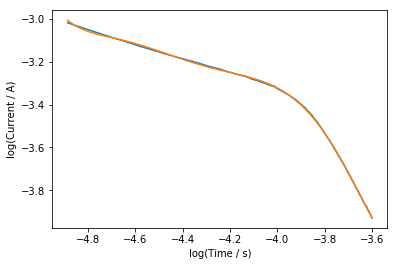

The zoomed-in polynomial for the double logarithmic plot:
 
       6       5        4        3             2
5.169 x + 132 x + 1400 x + 7900 x + 2.499e+04 x + 4.202e+04 x + 2.933e+04
 
Log(Time) value of knee point: -3.9639671910126753
 
Log(Current) value of knee point: -3.345924384360842
None
Intercept alpha 2: -11.414009056869157
Slope alpha 2: [-2.0794569]
Intercept alpha 1: -4.658187326227916
Slope alpha 1: [-0.33471626]
The Log(Time) value of the intersection: -3.87210660527793
The Log(Current) value of the intersection: -3.36213027418811


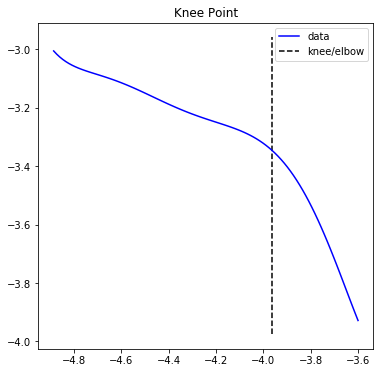

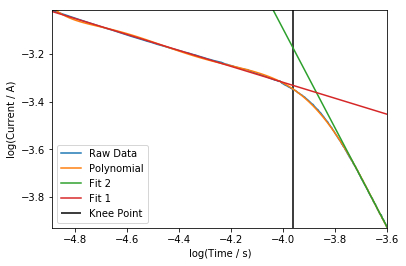

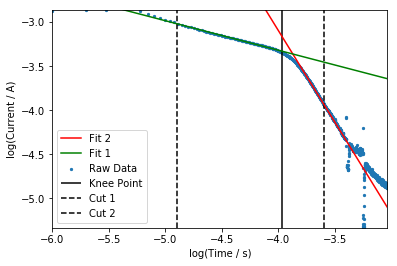

Slope of line corresponding to Alpha 1: -0.3347162627891475
Slope of line corresponding to Alpha 2: -2.079456896074557


In [58]:
# Sets the outputs of the widget to be of float64 type.
cut_max = float(text4.value)
cut_min = float(text5.value)

print("--------------------------------------------------------------------------------------------------")
# A new dataframe is created where values outside of the cuts are disgarded.
df3 = df2[df2["Log Time"] < -cut_min]
df3 = df3[df3["Log Time"] > -cut_max]

# A polynomial regression of the line between the cuts is generated. You can edit the number of free
# parameters after the 2nd comma.
f1 = np.polyfit(df3["Log Time"], df3["Log Current"], 6)
p1 = np.poly1d(f1)

# A linspace is used to allow us to plot our polynomial regression. You can edit the number of points in the
# linspace after the 2nd comma.
myline_2 = np.linspace(df3["Log Time"].min(), df3["Log Time"].max(), 100)

# Plots a double logarithmic graph of the data and of the polynomial between the two cuts.
plt.figure()
plt.plot(df3["Log Time"], df3["Log Current"])
plt.plot(myline_2, p1(myline_2))
#plt.title("log(Current) against log(Time)")
plt.xlabel("log(Time / s)")
plt.ylabel("log(Current / A)")
plt.show()

# Prints the linear equation of the polynomial regression between the two cuts.
print("The zoomed-in polynomial for the double logarithmic plot:")
print(" ")
print(p1)

# The kneedle algorithm searches for a knee point on a concave decreasing curve. This can be editted
# to be used for a convex and an increasing curve but that is not needed here. The knee point is saved
# into a variable known as kneedle_2
kneedle_2 = KneeLocator(myline_2, p1(myline_2), S = 1.0, curve = "concave", direction = "decreasing")
# The different components of kneedle_2 are given variable names
knee_x = kneedle_2.knee
knee_y = kneedle_2.knee_y
# The values of the logarithmic time and current for the kneedle algorithm alone are printed.
print(" ")
print("Log(Time) value of knee point:", knee_x)
print(" ")

print("Log(Current) value of knee point:", knee_y)
print(kneedle_2.plot_knee())

# Values used as the nearest points to the knee on the graph are chosen arbitrarily by adding and
# subtracting +/- 0.5 * the time of flight found using the kneedle method.
t_min = knee_x + math.log10(0.5 * -knee_x)
t_max = knee_x - math.log10(0.5 * -knee_x)

# 2 dataframes are created with only the data between the cuts and t_min or t_max
df4 = df3[df3["Log Time"] > t_min]
df5 = df3[df3["Log Time"] < t_max]

# The logarithmic time and current values are saved in lists which are then reshaped ready for use in
# the linear regression algorithm.
v = np.array(df4["Log Time"].values.tolist())
w = df4["Log Current"].tolist()
x = v.reshape((-1, 1))
y = w

# A linear regression is found with the slope and intercept being printed for both of the lines used
# in the bisection.
model1 = LinearRegression().fit(x, y)
intercept_1 = model1.intercept_
slope_alpha_2 = model1.coef_
print('Intercept alpha 2:', intercept_1)
print('Slope alpha 2:', slope_alpha_2)

v = np.array(df5["Log Time"].values.tolist())
w = df5["Log Current"].tolist()
x = v.reshape((-1, 1))
y = w

model2 = LinearRegression().fit(x, y)
intercept_2 = model2.intercept_
slope_alpha_1 = model2.coef_
print('Intercept alpha 1:', intercept_2)
print('Slope alpha 1:', slope_alpha_1)

# This finds the logarithmic time and current of the bisection of the two lines and prints
# them out.
x = Symbol('x')
m = solve(intercept_1 -intercept_2 + (slope_alpha_2 - slope_alpha_1) * x, x)
print("The Log(Time) value of the intersection:", m[x])
n = intercept_1 + slope_alpha_2 * m[x]
o = n[0]
print("The Log(Current) value of the intersection:", o)

# The zoomed-in double logarithmic plot is displayed with the bisection lines.
linspace = np.linspace(df2["Log Time"].min(), df2["Log Time"].max(), num=50)
plt.figure()
plt.plot(df3["Log Time"], df3["Log Current"], label = "Raw Data")
plt.plot(myline_2, p1(myline_2), label = "Polynomial")
plt.plot(linspace, slope_alpha_2*linspace + intercept_1, label = "Fit 2")
plt.plot(linspace, slope_alpha_1*linspace + intercept_2, label = "Fit 1")
plt.vlines(knee_x, df3["Log Current"].min(), df3["Log Current"].max(), label = "Knee Point")
#plt.title("log(Current) against log(Time)")
plt.xlabel("log(Time / s)")
plt.ylabel("log(Current / A)")
plt.xlim([df3["Log Time"].min(), df3["Log Time"].max()])
plt.ylim([df3["Log Current"].min(), df3["Log Current"].max()])
plt.legend()
plt.show()

# # The double logarithmic plot is displayed with the cuts, kneedle point, and the bisection lines.
plt.figure()
plt.scatter(df2["Log Time"], df2["Log Current"], label = "Raw Data", s = 5)
plt.plot(linspace, slope_alpha_2*linspace + intercept_1, label = "Fit 2", color = "red")
plt.plot(linspace, slope_alpha_1*linspace + intercept_2, label = "Fit 1", color = "green")
plt.vlines(knee_x, df2["Log Current"].min(), df2["Log Current"].max(), label = "Knee Point")
plt.vlines(-cut_max, df2["Log Current"].min(), df2["Log Current"].max(), label = "Cut 1", linestyles = "dashed")
plt.vlines(-cut_min, df2["Log Current"].min(), df2["Log Current"].max(), label = "Cut 2", linestyles = "dashed")
#plt.title("log(Current) against log(Time)")
plt.xlabel("log(Time / s)")
plt.ylabel("log(Current / A)")
plt.xlim([df2["Log Time"].min(), df2["Log Time"].max()])
plt.ylim([df2["Log Current"].min(), df2["Log Current"].max()])
plt.legend()
plt.savefig(str(graph_savename) + "/Scatter_doublelog" + str(Pad_Voltage) + "V.png", dpi = 300, bbox_inches = 'tight')
plt.show()

print("Slope of line corresponding to Alpha 1:", slope_alpha_1[0])
print("Slope of line corresponding to Alpha 2:", slope_alpha_2[0])

In [59]:
# A new dataframe is created including many different data columns as shown below. 
data = {'Pad Voltage/V': [Pad_Voltage], 'Resistance/Ohms': [Resistance], 'Thickness/m': [Thickness], 'Time [Fit]/microsecs': [10**6 * 10**(m[x])], 'Time [Knee]/microsecs': [10**6 * 10**(knee_x)], 'Dark current/ micro A': [10**6 * dark_current], 'Photocharge [Raw]/C': [y_int[-1]], 'Photocharge [Fit]/C': [photocharge], 'Photocharge error [Fit]/C': [photocharge_error], 'Alpha1': [1 + slope_alpha_1[0]], 'Alpha2': [-1 - slope_alpha_2[0]], 'Electric Field / (V/m)': [Pad_Voltage / Thickness], 'Mobility [Fit] / cm^2 V^-1 s^-1': [(10000 * (Thickness)**2) / (Pad_Voltage * 10**((m[x])))], 'Mobility [Knee] / cm^2 V^-1 s^-1': [(10000 * (Thickness)**2) / (Pad_Voltage * 10**((knee_x)))], 'sqrt(Electric Field) / (V/m)^0.5': [math.sqrt(Pad_Voltage / Thickness)]}  
main_dataframe = pd.DataFrame(data)

# The code checks if a prexisting file exists and appends the data to that dataframe if it does. If it does not
# exist a new csv file is created with generated headers.
if os.path.isfile(savename) == True:
    main_dataframe.to_csv(savename, mode = 'a', header = False, index = False)
else:
    main_dataframe.to_csv(savename, header = True, index = False)

[ 2.92705210e-04 -4.54268369e+00]
[ 3.25626904e-04 -4.51464875e+00]


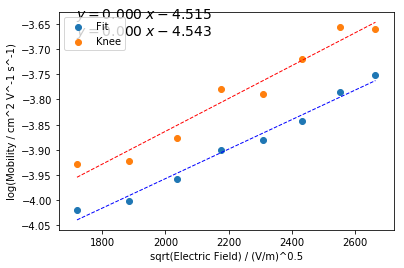

[ 0.78696538 36.51634043]


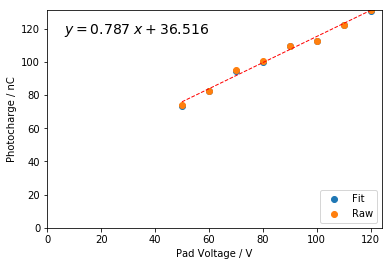

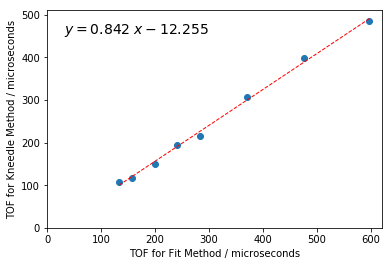

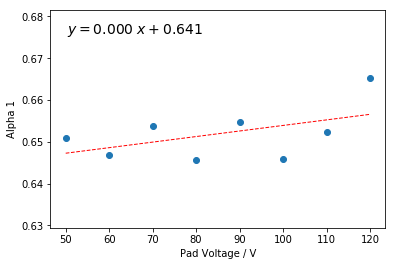

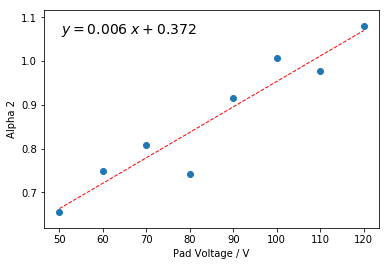

In [61]:
# A new dataframe for use in generating plots is created by reading the dataframe created above 
# and a Poole-Frenkel plot is created and saved.
new_df = pd.read_csv(savename)

# The logarithm of the mobility is found and saved into the dataframe.
new_df["LogMobilityFit"] = np.log10(new_df["Mobility [Fit] / cm^2 V^-1 s^-1"])
new_df["LogMobilityKnee"] = np.log10(new_df["Mobility [Knee] / cm^2 V^-1 s^-1"])

# A Poole-Frenkel plot is created and saved.
plt.figure()
plt.scatter(new_df["sqrt(Electric Field) / (V/m)^0.5"], np.log10(new_df["Mobility [Fit] / cm^2 V^-1 s^-1"]), label = "Fit")
plt.scatter(new_df["sqrt(Electric Field) / (V/m)^0.5"], np.log10(new_df["Mobility [Knee] / cm^2 V^-1 s^-1"]), label = "Knee")
#plt.title("log(Mobility) against Electric Field^0.5")
plt.xlabel("sqrt(Electric Field) / (V/m)^0.5")
plt.ylabel("log(Mobility / cm^2 V^-1 s^-1)")

# A linear regression is used to generate a trendline.
z = np.polyfit(new_df["sqrt(Electric Field) / (V/m)^0.5"], new_df["LogMobilityFit"], 1)
print(z)
y_hat = np.poly1d(z)(new_df["sqrt(Electric Field) / (V/m)^0.5"])

# The equation of the two linear regressions (for the knee fit and the bisection fit)
# is printed in the corner of the graph.
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.plot(new_df["sqrt(Electric Field) / (V/m)^0.5"], y_hat, "b--", lw=1)
z = np.polyfit(new_df["sqrt(Electric Field) / (V/m)^0.5"], new_df["LogMobilityKnee"], 1)
print(z)
y_hat = np.poly1d(z)(new_df["sqrt(Electric Field) / (V/m)^0.5"])
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='bottom')
plt.plot(new_df["sqrt(Electric Field) / (V/m)^0.5"], y_hat, "r--", lw=1)
plt.legend()
plt.savefig(str(graph_savename) + "/mobility_field.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# The photocharge is converted to nC from C and then a graph of photocharge against pad voltage
# is created.
new_df["Photocharge [Fit]/nC"] = new_df["Photocharge [Fit]/C"] * 1000000000
new_df["Photocharge [Raw]/nC"] = new_df["Photocharge [Raw]/C"] * 1000000000
plt.figure()
plt.scatter(new_df["Pad Voltage/V"], new_df["Photocharge [Fit]/nC"], label = "Fit")
plt.scatter(new_df["Pad Voltage/V"], new_df["Photocharge [Raw]/nC"], label = "Raw")
#plt.title("Photocharge against Pad Voltage")
plt.xlabel("Pad Voltage / V")
plt.ylabel("Photocharge / nC")
plt.ylim([0, new_df["Photocharge [Raw]/nC"].max()])
plt.xlim(0,)

# A trendline is plotted and its equation is put in the corner of the graph.
z = np.polyfit(new_df["Pad Voltage/V"], new_df["Photocharge [Raw]/nC"], 1)
print(z)
y_hat = np.poly1d(z)(new_df["Pad Voltage/V"])
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.plot(new_df["Pad Voltage/V"], y_hat, "r--", lw=1)
plt.legend(loc = "lower right")
plt.savefig(str(graph_savename) + "/photocharge_voltage.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# A graph of knee time v bisection time is plotted with a trendline and its equation.
plt.figure()
plt.scatter(new_df["Time [Fit]/microsecs"], new_df["Time [Knee]/microsecs"])
#plt.title("TOF of Kneedle Method against TOF of Fit Method")
plt.xlabel("TOF for Fit Method / microseconds")
plt.ylabel("TOF for Kneedle Method / microseconds")
z = np.polyfit(new_df["Time [Fit]/microsecs"], new_df["Time [Knee]/microsecs"], 1)
y_hat = np.poly1d(z)(new_df["Time [Fit]/microsecs"])
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.plot(new_df["Time [Fit]/microsecs"], y_hat, "r--", lw=1)
plt.ylim(0,)
plt.xlim(0,)
plt.savefig(str(graph_savename) + "/kneedletime_fittime.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# Creates a plot of alpha1 against pad voltage.
plt.figure()
plt.scatter(new_df["Pad Voltage/V"], new_df["Alpha1"])
#plt.title("Alpha 1 against Pad Voltage")
plt.xlabel("Pad Voltage / V")
plt.ylabel("Alpha 1")
z = np.polyfit(new_df["Pad Voltage/V"], new_df["Alpha1"], 1)
y_hat = np.poly1d(z)(new_df["Pad Voltage/V"])
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.plot(new_df["Pad Voltage/V"], y_hat, "r--", lw=1)
plt.savefig(str(graph_savename) + "/alpha1_voltage.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# Creates a plot of alpha2 against pad voltage.
plt.figure()
plt.scatter(new_df["Pad Voltage/V"], new_df["Alpha2"])
#plt.title("Alpha 2 against Pad Voltage")
plt.xlabel("Pad Voltage / V")
plt.ylabel("Alpha 2")
z = np.polyfit(new_df["Pad Voltage/V"], new_df["Alpha2"], 1)
y_hat = np.poly1d(z)(new_df["Pad Voltage/V"])
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.plot(new_df["Pad Voltage/V"], y_hat, "r--", lw=1)
plt.savefig(str(graph_savename) + "/alpha2_voltage.png", dpi = 300, bbox_inches = 'tight')
plt.show()

Qm = qs/d, QM(vacuum)/QM(air), is it physical that exposure traps electrons (paul blom),

Dark current v Voltage IV graph (include hole data), Qvac against Qair, schockley